**Analisis Penjualan di 3 Cabang Supermarket**
---



Data = https://drive.google.com/file/d/1V9MiNNLHS5BvwV5wy_3FHb4LQfhKLW-V/view

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Menampilkan Data

In [ ]:
df = pd.read_csv("/content/supermarket_sales.csv")
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
62,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0
671,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.3400,196.1400,3/30/2019,16:34,Cash,186.80,4.761905,9.3400,5.5
119,378-24-2715,B,Mandalay,Normal,Male,Home and lifestyle,53.44,2,5.3440,112.2240,1/20/2019,20:38,Ewallet,106.88,4.761905,5.3440,4.1
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
364,272-27-9238,C,Naypyitaw,Normal,Female,Food and beverages,41.24,4,8.2480,173.2080,2/19/2019,16:23,Cash,164.96,4.761905,8.2480,7.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
print(f"Jumlah kolom :{df.shape[1]}\nJumlah baris :{df.shape[0]}")

Jumlah kolom :17
Jumlah baris :1000


## Cek Data Duplikat

In [ ]:
df.duplicated().any()

False

## Cek Missing Value

In [ ]:
pd.DataFrame({'jumlah': df.shape[0],
              'nulls': df.isna().sum(),
              'nulls%': df.isna().mean() * 100,
              'cardinality': df.nunique(),
             })

,jumlah,nulls,nulls%,cardinality
Invoice ID,1000,0,0.0,1000
Branch,1000,0,0.0,3
City,1000,0,0.0,3
Customer type,1000,0,0.0,2
Gender,1000,0,0.0,2
Product line,1000,0,0.0,6
Unit price,1000,0,0.0,943
Quantity,1000,0,0.0,10
Tax 5%,1000,0,0.0,990
Total,1000,0,0.0,990


In [ ]:
df[df.isna().any(axis=1)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


Berdasarkan hasil pengecekan missing value dapat kita ketahui bahwa:
Tidak terdapat missing value diseluruh kolom pada dataset ini

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

## Statistik Deskriptif

In [ ]:
#Melihat statistik deskriptif data bertipe data numerik
#df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


## Visualisasi Data

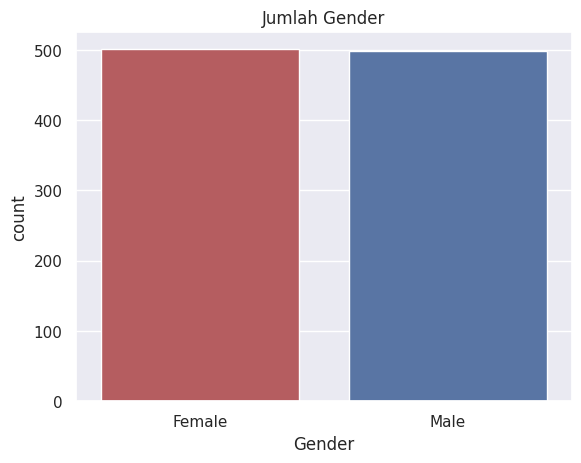

In [ ]:
sns.set(style="darkgrid")
JumlahGender  = sns.countplot(x="Gender", data =df, hue='Gender', palette=['r', 'b']).set_title("Jumlah Gender")

Text(0.5, 1.0, 'Rating tiap Branch')

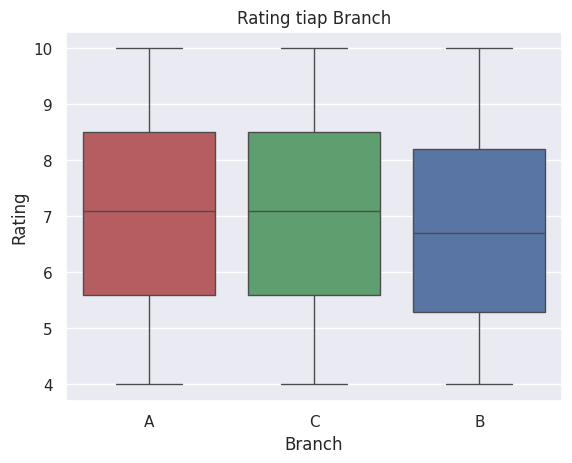

In [ ]:
sns.boxplot(x="Branch", y = "Rating", data =df, hue='Branch', palette=['r', 'g', 'b']).set_title("Rating tiap Branch")

<ipython-input-58-05f06ec04c48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Branch'], palette=['r', 'g', 'b'], legend=False)


Branch A - 340
Branch B - 328
Branch C - 332


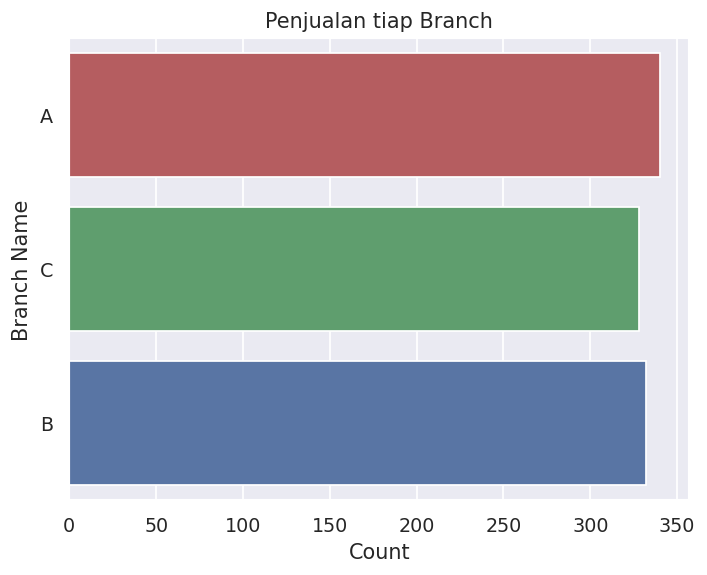

In [ ]:
# Branch Count
plt.figure(dpi=125)
sns.countplot(df['Branch'], palette=['r', 'g', 'b'], Decending=False)
plt.xlabel('Count')
plt.ylabel('Branch Name')
plt.title('Branch mana yang paling sibuk?')
A,B,C =df.Branch.value_counts()

print('Branch A -',A)
print('Branch B -',C)
print('Branch C -',B)

<ipython-input-33-2ea5d6656c50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Unit price"])


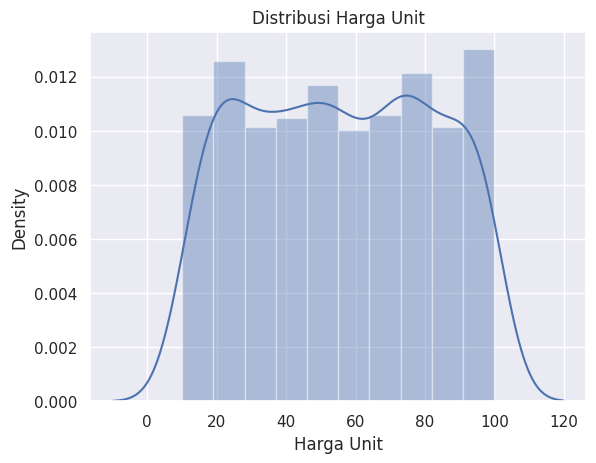

In [ ]:
sns.distplot(df["Unit price"])
plt.title("Distribusi Harga Unit")
plt.xlabel("Harga Unit")
plt.show()

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=df,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()